In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\4)Clustering\Assignment Given\crime_data.csv"

In [3]:
path=path.replace('\\', '/')

In [4]:
path

'C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/4)Clustering/Assignment Given/crime_data.csv'

In [5]:
df=pd.read_csv(path,)

In [6]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Initial Observations 
1)No missing values observed
2)1 Categorical columns found.



In [9]:
#Lets normalize tge data for a better understanding of plot

In [10]:
def norm_func(i):
       X = (i-i.min())/(i.max()-i.min())
       return (X)

In [11]:
df_norm = norm_func(df.iloc[:,1:])

In [12]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [13]:
###### screw plot or elbow curve ############

In [14]:
k = list(range(2,15))

TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))


In [15]:
TWSS

[array([16.96661211]),
 array([14.59566832]),
 array([12.72623173]),
 array([11.73429534]),
 array([11.15542079]),
 array([10.65428644]),
 array([10.23747775]),
 array([9.53709248]),
 array([8.97493103]),
 array([8.49150228]),
 array([8.12760956]),
 array([7.79522419]),
 array([7.61844848])]

In [16]:
# Lets plot Scree plot!

([<matplotlib.axis.XTick at 0x1fd46bdaf88>,
 <a list of 13 Text major ticklabel objects>)

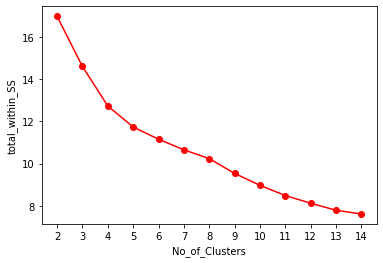

In [17]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [18]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
df['clust']=md # creating a  new column and assigning it to new column 
# df_norm.head()

df = df.iloc[:,[5,0,1,2,3,4]]

df.iloc[:,2:6].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.091667,76.000000,52.083333,11.833333
2,7.340000,157.000000,63.300000,20.440000
3,14.671429,251.285714,54.285714,21.685714
4,4.955556,125.444444,80.111111,17.788889


In [20]:
df.to_csv("Crime_Data_ritz_Kmeans.csv")


In [23]:
file=pd.read_csv("Crime_Data_ritz_Kmeans.csv",index_col=0)

In [24]:
file

,clust,Unnamed: 0.1,Murder,Assault,UrbanPop,Rape
0,3,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,0,Arizona,8.1,294,80,31.0
3,2,Arkansas,8.8,190,50,19.5
4,0,California,9.0,276,91,40.6
5,0,Colorado,7.9,204,78,38.7
6,4,Connecticut,3.3,110,77,11.1
7,2,Delaware,5.9,238,72,15.8
8,0,Florida,15.4,335,80,31.9
9,3,Georgia,17.4,211,60,25.8
